In [1]:
import sys
sys.path.append('/home/biswajitsc_google_com/nfs_mount/hierarchicalforecasting/')

import pandas as pd
import data_loader
import numpy as np
import datetime as dt
import pickle
import matplotlib.pyplot as plt
from datetime import datetime

In [2]:
start = "2016-06-29"
end = "2017-08-15"

date_format = "%Y-%m-%d"
start = datetime.strptime(start, date_format)
end = datetime.strptime(end, date_format)
diff = end-start
diff.days

next_date = start + dt.timedelta(days=-3)
type(next_date.isocalendar()[1:3])

tuple

In [3]:
df = pd.read_csv('../data/favorita/aggregate_sales10.csv', sep=',')
df['date'] = pd.to_datetime(df.date)
df.sort_values(by='date', inplace=True)
df.loc[df['ml_use'] == 'TEST']

,store,item,date,week_of_year,day_of_week,unit_sales,on_promo,item_family,item_class,perishable,weight,ml_use
108087,0,13300,2017-07-31,31,0,343.122,False,SEAFOOD,2850,1,63.75,TEST
110248,9,12109,2017-07-31,31,0,6.000,0,LAWN AND GARDEN,6918,0,4.00,TEST
10136,8,11308,2017-07-31,31,0,4865.000,False,GROCERY I,1016,0,831.00,TEST
6951,0,10500,2017-07-31,31,0,1.000,0,BOOKS,5192,0,1.00,TEST
40018,0,11100,2017-07-31,31,0,2423.000,False,EGGS,2502,1,322.50,TEST
...,...,...,...,...,...,...,...,...,...,...,...,...
113422,0,12400,2017-08-15,33,1,140.000,False,MAGAZINES,5222,0,40.00,TEST
111054,7,13307,2017-08-15,33,1,46.507,False,SEAFOOD,2850,1,7.50,TEST
96694,8,12108,2017-08-15,33,1,38.000,False,LAWN AND GARDEN,6920,0,10.00,TEST
67103,9,10409,2017-08-15,33,1,3530.000,False,BEVERAGES,1124,0,341.00,TEST


In [15]:
for it in df[['item', 'date', 'unit_sales']].itertuples():
    print((it[2] - start).days)
    break

0


In [19]:
feats = pd.read_csv('../data/favorita/holidays_events.csv', sep=',')
feats['date'] = pd.to_datetime(feats.date)
feats.sort_values(by='date', inplace=True)
feats

,date,type,locale,locale_name,description,transferred
0,2012-03-02,Holiday,Local,Manta,Fundacion de Manta,False
1,2012-04-01,Holiday,Regional,Cotopaxi,Provincializacion de Cotopaxi,False
2,2012-04-12,Holiday,Local,Cuenca,Fundacion de Cuenca,False
3,2012-04-14,Holiday,Local,Libertad,Cantonizacion de Libertad,False
4,2012-04-21,Holiday,Local,Riobamba,Cantonizacion de Riobamba,False
...,...,...,...,...,...,...
345,2017-12-22,Additional,National,Ecuador,Navidad-3,False
346,2017-12-23,Additional,National,Ecuador,Navidad-2,False
347,2017-12-24,Additional,National,Ecuador,Navidad-1,False
348,2017-12-25,Holiday,National,Ecuador,Navidad,False


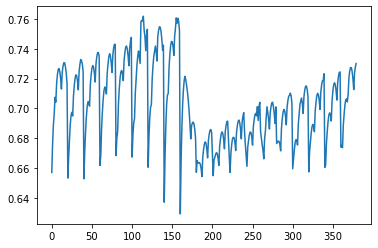

In [13]:
with open('../data/favorita/alternate_ts.pkl', 'rb') as fin:
    ts_data = pickle.load(fin)
plt.plot(ts_data[20:,50])


In [3]:
with open('../data/favorita/data.pkl', 'rb') as fin:
    tree, num_ts, ts_data, \
    (global_cont_feats, global_cat_feats, global_cat_dims) \
    = pickle.load(fin)

(413, 360)


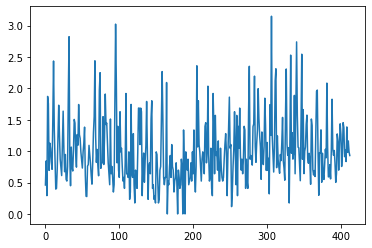

In [6]:
print(ts_data.shape)
scale = np.mean(np.abs(ts_data), axis=0)
rescaled = ts_data / scale
plt.plot(rescaled[:, 50])

mat = np.load('evals.npy')

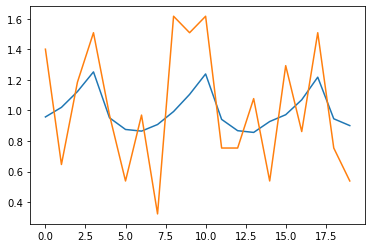

In [16]:

idx = 100
plt.plot(mat[:, idx])
plt.plot(rescaled[-20:, idx])